In [2]:
#John David Conley
#Machine Learning
#Assignment 5
#11-8-2022
#https://github.com/DavidConley/machinelearning05

In [3]:
#Programming elements:
#Principal Component Analysis

#In class programming:
#1. Principal Component Analysis
#a. Apply PCA on CC dataset.
#b. Apply k-means algorithm on the PCA result and report your observation if the silhouette score has improved or not?
#c. Perform Scaling+PCA+K-Means and report performance.
#2. Use pd_speech_features.csv
#a. Perform Scaling
#b. Apply PCA (k=3)
#c. Use SVM to report performance
#3. Apply Linear Discriminant Analysis (LDA) on Iris.csv dataset to reduce dimensionality of data to k=2.
#4. Briefly identify the difference between PCA and LDA

#Submission guideline:
#• Make a report, containing screenshots of your results.
#• Provide brief description with each screenshot to elaborate the output results.
#• Push your code to github and provide link in your report.
#• Also make 1-3 mins video demonstrating your results (Exemption of video submission if demonstrated in class). 

import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, accuracy_score
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import metrics, preprocessing
from sklearn.svm import SVC, LinearSVC
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

In [4]:
#1
##a
dataset = pd.read_csv('CC.csv')
dataset2 = dataset.fillna(dataset.mean()).drop(['CUST_ID'], axis=1)
x = dataset.iloc[:,[1,2,3,4]]
y = dataset.iloc[:,-1]
scaler = StandardScaler()
scaler.fit(x)
x_scaler = scaler.transform(x)
pca = PCA(2)
pca.fit(dataset2)
x_pca = pca.fit_transform(x_scaler)
df2 = pd.DataFrame(data=x_pca)
print(df2)

             0         1
0    -0.786173  0.422114
1    -0.278329 -0.803393
2     0.255916 -0.630364
3     0.277478  0.873840
4    -0.510060 -0.341918
...        ...       ...
8945 -0.542699 -0.074328
8946 -0.541276 -0.070474
8947 -0.758142  0.389568
8948 -0.803969  0.375511
8949 -0.157726  1.060230

[8950 rows x 2 columns]


In [5]:
#pca2 = PCA(n_clusters=3)
#pca2.fit(dataset2)
#y_cluster_pca = pcas2.predict(dataset2)
#score = metrics.silhouette_score(dataset2, y_cluster_pca)
#print(score)

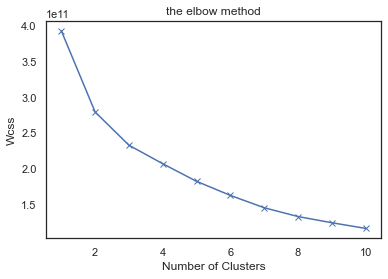

In [6]:
##b
dataset2 = dataset.fillna(dataset.mean()).drop(['CUST_ID'], axis=1)
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(dataset2)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss, 'bx-')
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [7]:
kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(df2)
y_cluster_kmeans = kmeans2.predict(df2)
score = metrics.silhouette_score(df2, y_cluster_kmeans)
print(score)

MemoryError: Unable to allocate 611. MiB for an array with shape (8950, 8950) and data type float64

In [8]:
##c
df3 = dataset2.copy()
df3.head()

X = df3.drop('TENURE',axis=1).values
y = df3['TENURE'].values

X_Scale = scaler.fit_transform(X)

pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X_Scale)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, dataset2[['TENURE']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,TENURE
0,-1.718893,-1.072941,12
1,-1.169311,2.509314,12
2,0.938414,-0.382602,12
3,-0.907505,0.045856,12
4,-1.637830,-0.684976,12


In [9]:
X = finalDf.drop('TENURE',axis=1).values
y = finalDf['TENURE'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [10]:
%%time

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train,y_train)

y_train_hat =logisticRegr.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_hat)*100
print('"Accuracy for our Training dataset with PCA is: %.4f %%' % train_accuracy)

"Accuracy for our Training dataset with PCA is: 84.0543 %
Wall time: 359 ms


In [11]:
%%time

y_test_hat=logisticRegr.predict(X_test)
test_accuracy=accuracy_score(y_test,y_test_hat)*100
test_accuracy
print("Accuracy for our Testing dataset with tuning is : {:.3f}%".format(test_accuracy) )

Accuracy for our Testing dataset with tuning is : 86.331%
Wall time: 4 ms


In [12]:
#2
datasetB = pd.read_csv('pd_speech_features.csv')
datasetB.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [13]:
##a
scaler = StandardScaler()
datasetB2 = scaler.fit_transform(datasetB)
datasetB2

array([[-1.72519117,  0.96874225,  0.62764391, ..., -0.81472704,
        -0.36659507,  0.58345997],
       [-1.72519117,  0.96874225,  0.12161952, ..., -0.58297219,
         0.40039616,  0.58345997],
       [-1.72519117,  0.96874225,  0.61795018, ..., -0.8043897 ,
        -0.7809355 ,  0.58345997],
       ...,
       [ 1.72519117, -1.03226633,  0.81336154, ..., -0.79017671,
        -0.77287314, -1.71391365],
       [ 1.72519117, -1.03226633,  0.54105055, ..., -0.82631929,
        -0.81173208, -1.71391365],
       [ 1.72519117, -1.03226633,  0.3945807 , ..., -0.84098293,
        -0.82811405, -1.71391365]])

In [14]:
##b
X_Scale = scaler.fit_transform(X)

pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X_Scale)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, datasetB[['class']]], axis = 1)
finalDf.head()


,principal component 1,principal component 2,class
0,-0.577544,-0.800106,1.0
1,1.350717,-0.544288,1.0
2,-0.205947,0.436810,1.0
3,0.024683,-0.422423,1.0
4,-0.368710,-0.762373,1.0


In [15]:
##c
X_train = datasetB.drop("class", axis=1)
Y_train = datasetB["class"]

X_test = datasetB.drop("id",axis=1)

svc = SVC(max_iter=1000)

svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)

acc_svc = round(svc.score(X_train, Y_train) * 100, 2)

print("svm accuracy =", acc_svc)

svm accuracy = 75.53


In [16]:
#3
datasetC = pd.read_csv('Iris.csv')
datasetC.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
datasetC2 = datasetC.drop("Species", axis=1)
datasetC['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [18]:
scaler = StandardScaler()

X = datasetC2.drop('PetalWidthCm',axis=1).values
y = datasetC2['PetalWidthCm'].values

X_Scale = scaler.fit_transform(X)

pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X_Scale)

principalDfC = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDfC = pd.concat([principalDfC, datasetC2[['PetalWidthCm']]], axis = 1)
finalDfC.head()

,principal component 1,principal component 2,PetalWidthCm
0,-2.501021,0.451868,0.2
1,-2.279945,-0.696698,0.2
2,-2.559435,-0.383488,0.2
3,-2.476060,-0.636243,0.2
4,-2.579407,0.611050,0.2


Text(0, 0.5, 'pc2')

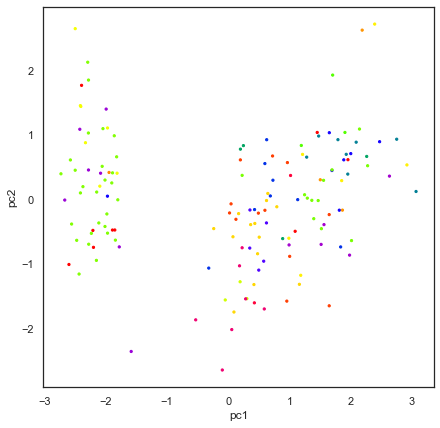

In [19]:
plt.figure(figsize=(7,7))
plt.scatter(finalDfC['principal component 1'],finalDfC['principal component 2'],c=finalDfC['PetalWidthCm'],cmap='prism', s =5)
plt.xlabel('pc1')
plt.ylabel('pc2')

In [20]:
#4
print("LDA is supervised (using class label), and PCA is unsupervised (ignoring it).")

LDA is supervised (using class label), and PCA is unsupervised (ignoring it).
